### 4.1 Gamma function plot

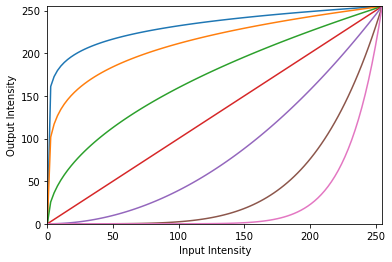

In [3]:
import numpy as np
import matplotlib.pyplot as plt

gamma1 = 0.1
gamma2 = 0.2
gamma3 = 0.5
gamma4 = 1.0
gamma5 = 2.0
gamma6 = 5.0
gamma7 = 10.0

c1 = 255.0 / ( 255.0 ** gamma1 )
c2 = 255.0 / ( 255.0 ** gamma2 )
c3 = 255.0 / ( 255.0 ** gamma3 )
c4 = 255.0 / ( 255.0 ** gamma4 )
c5 = 255.0 / ( 255.0 ** gamma5 )
c6 = 255.0 / ( 255.0 ** gamma6 )
c7 = 255.0 / ( 255.0 ** gamma7 )

x  = np.linspace( 0, 255, 100 )

y1 = x ** gamma1 * c1
y2 = x ** gamma2 * c2
y3 = x ** gamma3 * c3
y4 = x ** gamma4 * c4
y5 = x ** gamma5 * c5
y6 = x ** gamma6 * c6
y7 = x ** gamma7 * c7

plt.plot( x, y1, x, y2, x, y3, x, y4, x, y5, x, y6, x, y7 )
plt.xlabel( "Input Intensity" )
plt.ylabel( "Output Intensity" )
plt.xlim( [0,255] )
plt.ylim( [0,255] )
plt.savefig('gamma.png')
plt.show( )


### <font color="Red">4.2 Gamma Correction </font>
<img src="Museum.bmp" width="300px" height="300px">original image 
<img src="Museum_Gamma_0_1.bmp" width="300px" height="300px">Gamma: 0.1
<img src="Museum_Gamma_0_2.bmp" width="300px" height="300px">Gamma: 0.2
<img src="Museum_Gamma_0_5.bmp" width="300px" height="300px">Gamma: 0.5
<img src="Museum_Gamma_2_0.bmp" width="300px" height="300px">Gamma: 2.0

3


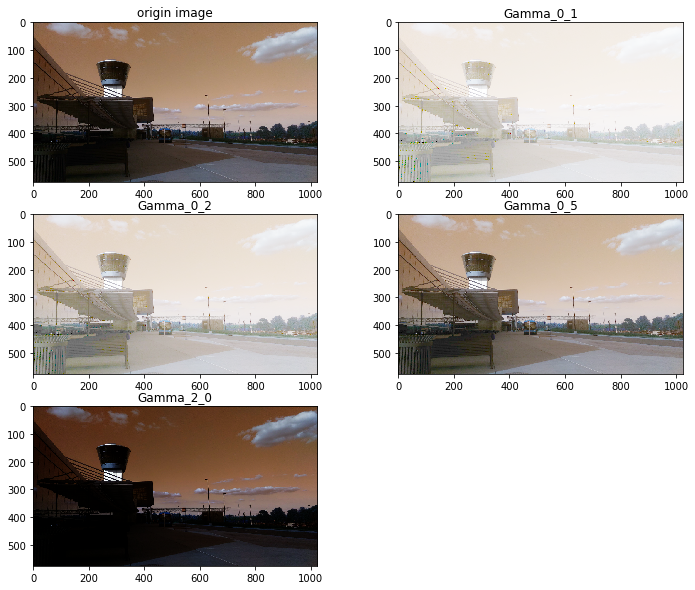

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c = 255.0 / ( 255.0 ** gamma )
    for i in range(nr):
        for j in range(nc):
            g[ i, j ] = f[ i, j ] ** gamma * c
    return g

def main( ):
    img = cv2.imread( "Museum.bmp", cv2.IMREAD_COLOR)
    print(img.ndim)
    img1 = gamma_correction( img, 0.1 )
    img2 = gamma_correction( img, 0.2 )
    img3 = gamma_correction( img, 0.5 )
    img4 = gamma_correction( img, 2.0 )
    #cv2.imwrite( "Museum_Gamma_0_1.bmp", img1 )
    #cv2.imwrite( "Museum_Gamma_0_2.bmp", img2 )
    #cv2.imwrite( "Museum_Gamma_0_5.bmp", img3 )
    #cv2.imwrite( "Museum_Gamma_2_0.bmp", img4 )
    plt.figure(figsize=(12, 10))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(3,2,2)     
    plt.title('Gamma_0_1') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(3,2,3)     
    plt.title('Gamma_0_2') 
    plt.imshow(img2,cmap=plt.cm.gray)
    plt.subplot(3,2,4)     
    plt.title('Gamma_0_5') 
    plt.imshow(img3,cmap=plt.cm.gray)
    plt.subplot(3,2,5)     
    plt.title('Gamma_2_0') 
    plt.imshow(img4,cmap=plt.cm.gray)
    
main( )

### 4.3 Beta Function

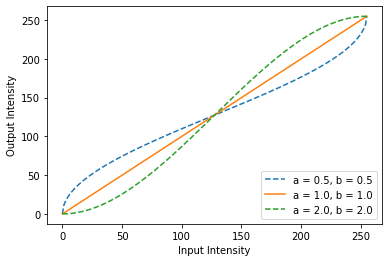

In [21]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

x = np.linspace( 0, 1, 256 )
x1 = x * 255
y1 = special.betainc( 0.5, 0.5, x ) * 255
y2 = x1
y3 = special.betainc( 2.0, 2.0, x ) * 255

plt.plot( x1, y1, '--', label = 'a = 0.5, b = 0.5' )
plt.plot( x1, y2, '-',  label = 'a = 1.0, b = 1.0' )
plt.plot( x1, y3, '--', label = 'a = 2.0, b = 2.0' )
plt.xlabel( 'Input Intensity' )
plt.ylabel( 'Output Intensity' )
plt.legend( loc = 'lower right' )

plt.show( )

### <font color="Red">4.4 Beta Function</font>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html">  special.betainc </a>
<img src="Building.bmp" width="200">original image 
<img src="Building_Beta_0_1_0_5.bmp" width="200">Beta function: a=0.1, b=0.5
<img src="Building_Beta_2_0_2_0.bmp" width="200">Beta function: a=2.0, b=2.0

(810, 600, 3)


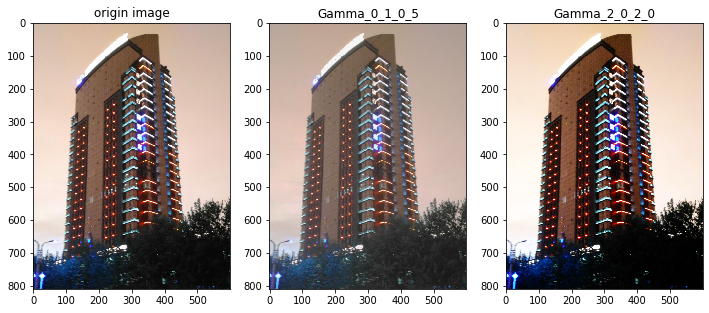

In [23]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def beta_correction( f, a = 2.0, b = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    x = np.linspace( 0, 1, 256 )
    table = np.round( special.betainc( a, b, x ) * 255, 0 )
    for i in range ( nr ):
        for j in range( nc ):
            g[i, j] = table[f[i, j]] 
    return g

def main( ):
    img = cv2.imread( "Building.bmp", cv2.IMREAD_COLOR)
    img1 = beta_correction( img, a = 0.5, b = 0.5 )
    img2 = beta_correction( img, a = 2.0, b = 2.0 )
    print(img.shape)
    plt.figure(figsize=(12, 10))
    plt.subplot(1,3,1)   
    plt.title('origin image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('Gamma_0_1_0_5') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('Gamma_2_0_2_0') 
    plt.imshow(img2,cmap=plt.cm.gray)


main( )

### 4.5 Histogram <p>
指令：cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)

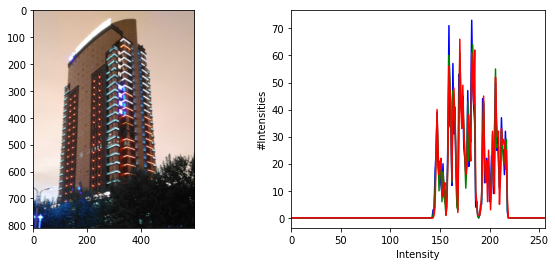

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    if f.ndim != 3:
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
    else:
        color = ( 'b', 'g', 'r' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( f, [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
#    img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
    img = cv2.imread( "Building.bmp", -1 )
    histogram( img )

main( )

### 4.6 Histogram Equalization

In [ ]:
import numpy as np
import cv2

img1 = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
img2 = cv2.equalizeHist( img1 )
cv2.imwrite( "Indoor_Over_Exposure_Equal.bmp", img2 )

### 4.7 1-D Convolution 

In [ ]:
import numpy as np

#x = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
x = np.array( [ 0, 0, 0, 1, 0, 0, 0 ] )
h = np.array( [ 1, 2, 3, 1, 1 ] )
y = np.convolve( x, h, 'full' )
y1 = np.convolve( x, h, 'same' )
print( "x =", x )
print( "h =", h )
print( "Full Convolution y =", y )
print( "Convolution y =", y1 )
z = np.correlate(x,h,'full')
z1 = np.correlate(x,h,'same')
print( "Full Correlation z =", z )
print( "Correlation z =", z1 )

### 4.8 2-D Convolution

In [8]:
import numpy as np
from scipy.signal import convolve2d

#x = np.array( [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ] )
x = np.array( [ [0, 0, 0], [0, 1, 0], [0, 0, 0] ] )
h = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )
y = convolve2d( x, h, 'same' )
print( "x =" )
print( x )
print( "h =" )
print( h )
print( "Convolution y =" )
print( y )

x =
[[0 0 0]
 [0 1 0]
 [0 0 0]]
h =
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Convolution y =
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### 4.9 Average Filtering

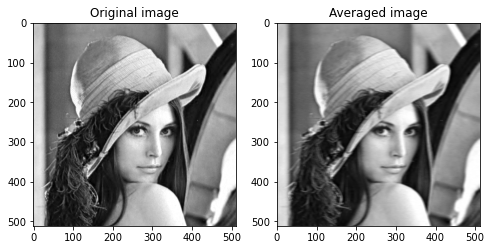

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.blur( img1, ( 7, 1 ) )
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Averaged image') 
plt.imshow(img2,cmap=plt.cm.gray)

### <font color="Red"> 4.10 Please write a Average Filter without using opencv function
    請自行撰寫迴圈!

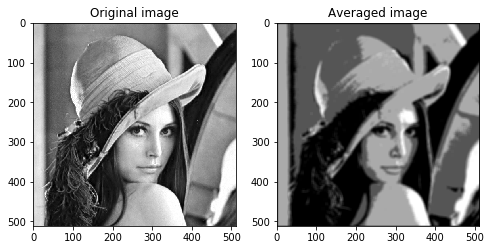

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def average( f , a, b):
    g = f.copy( )
    
    nr, nc = f.shape[:2]
    a_t=a//2
    h = np.zeros((nr+2*a_t,nc+2*a_t))#use zero padding
    h[a_t:a_t+nr,a_t:a_t+nc]=g
    for i in range(a_t,a_t+nr):
        for j in range(a_t,a_t+nc):
            g[i-a_t,j-a_t]=np.sum(h[i-a_t:i+a_t,j-a_t:j+a_t]//(a*b))
    return g
    
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = average( img1,9,9)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Averaged image') 
plt.imshow(img2,cmap=plt.cm.gray)

### 4.11 Gaussian function <p>
    Opencv 提供的高斯濾波器稱為 GaussianBlur <p>
    會依據濾波器的大小，自動計算標準差

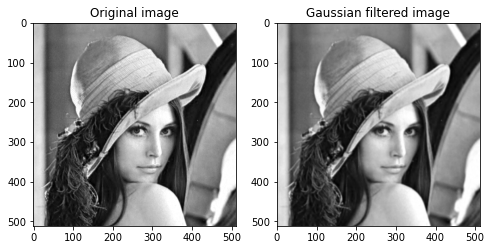

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.GaussianBlur( img1, ( 5, 5 ), 0 )
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)     
plt.title('Original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(1,2,2)     
plt.title('Gaussian filtered image') 
plt.imshow(img2,cmap=plt.cm.gray)

### 4.12 Image Gradient

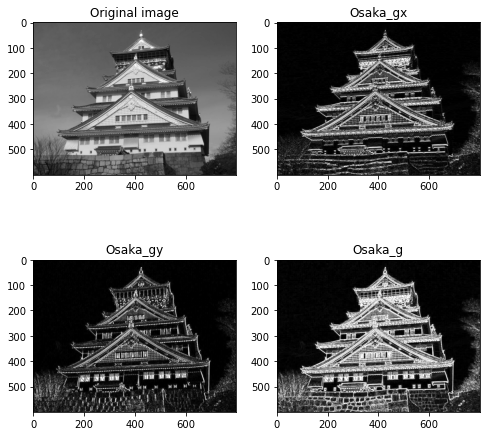

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def Sobel_gradient( f, direction = 1 ):
    sobel_x = np.array( [ [-1,-2,-1], [ 0, 0, 0], [ 1, 2, 1] ] )
    sobel_y = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] )
    if direction == 1:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        gx = abs( grad_x )
        g = np.uint8( np.clip( gx, 0, 255 ) )
    elif direction == 2:
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        gy = abs( grad_y )
        g = np.uint8( np.clip( gy, 0, 255 ) )
    else:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        magnitude = abs( grad_x ) + abs( grad_y )
        g = np.uint8( np.clip( magnitude, 0, 255 ) )
    return g

def main( ):
    img = cv2.imread( "Osaka.bmp", -1 )
    gx  = Sobel_gradient( img, 1 )
    gy  = Sobel_gradient( img, 2 )
    g   = Sobel_gradient( img, 3 )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)     
    plt.title('Original image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(2,2,2)     
    plt.title('Osaka_gx') 
    plt.imshow(gx,cmap=plt.cm.gray)
    plt.subplot(2,2,3)     
    plt.title('Osaka_gy') 
    plt.imshow(gy,cmap=plt.cm.gray)
    plt.subplot(2,2,4)     
    plt.title('Osaka_g') 
    plt.imshow(g,cmap=plt.cm.gray)

main( )

### 4.13 Laplacian

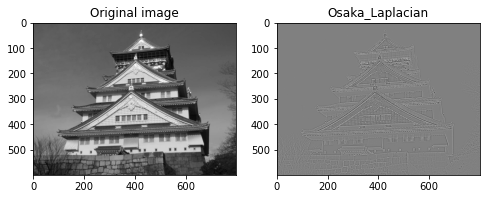

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def laplacian( f ):
    temp = cv2.Laplacian( f, cv2.CV_64F ) + 128
    g = np.uint8( np.clip( temp, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = laplacian( img1 )

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    plt.title('Osaka_Laplacian') 
    plt.imshow(img2,cmap=plt.cm.gray)
    
main( )

### <font color="Red">4.14 Laplacian Sharpening</font><p>
請勿使用cv2.Laplacian，需自己撰寫 Laplacian 的副程式 <p>
<img src="Osaka.bmp" width="600px" height="600px"> original image
<img src="Osaka_Laplacian_sharpening.bmp" width="600px" height="600px"> Laplacian sharpen image

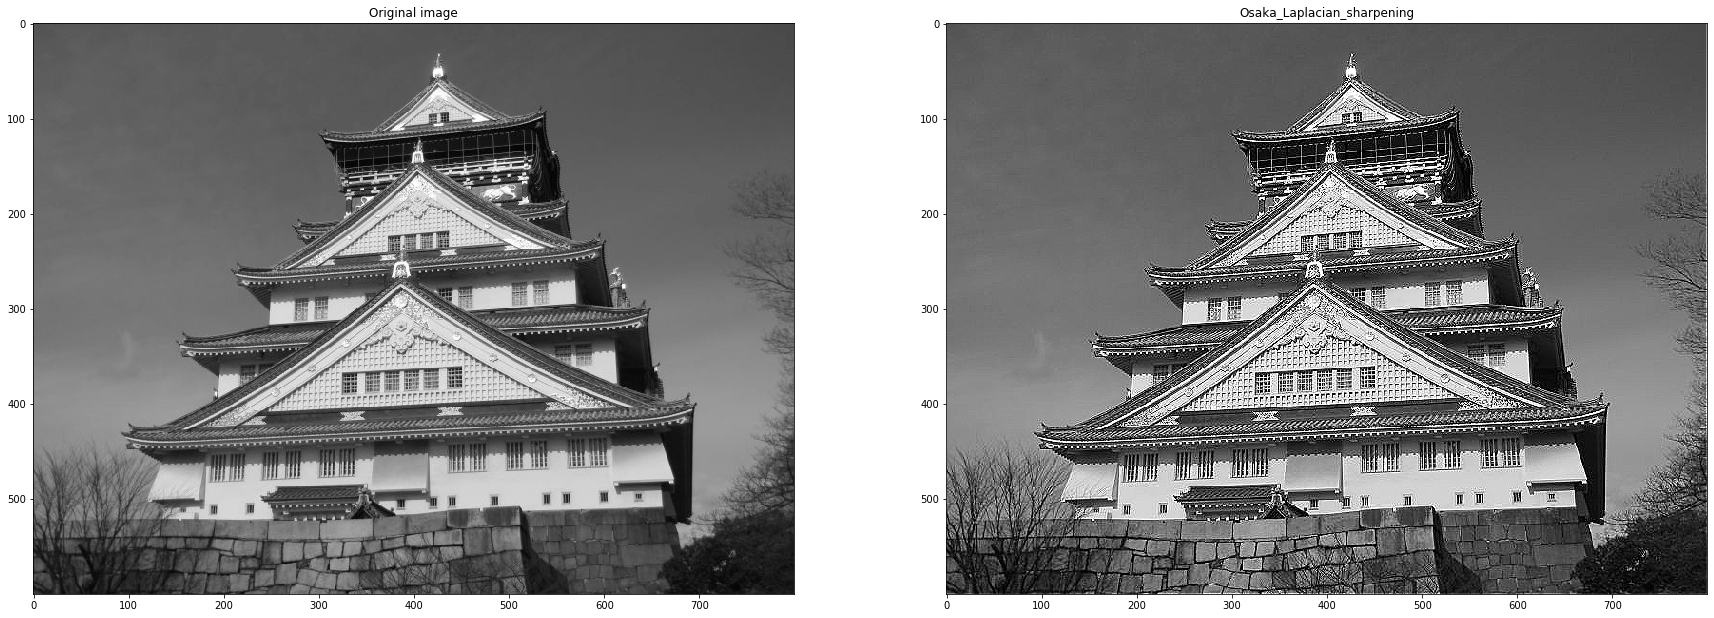

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def LaplacianMy(f):
    nr, nc = f.shape[:2]
    x = np.zeros([nr, nc])
    g = np.zeros([nr+2, nc+2])
    nd = f.ndim
    for i in range(nr):
        for j in range(nc):
            g[i+1, j+1] = f[i, j]
    for i in range(nr):
        for j in range(nc):
            x[i, j] = (-1) * g[i, j+1] + (-1) * g[i+1, j] + 5 * g[i+1, j+1] + (-1) * g[i+1, j+2] + (-1) * g[i+2, j+1]
            x[i, j] = np.uint8( np.clip( x[i, j], 0, 255 ) )
    return x
  #73              

def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = LaplacianMy( img1 )

    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(1,2,2)     
    plt.title('Osaka_Laplacian_sharpening') 
    plt.imshow(img2,cmap=plt.cm.gray)    
   
main( )

### 4.15 unsharpen

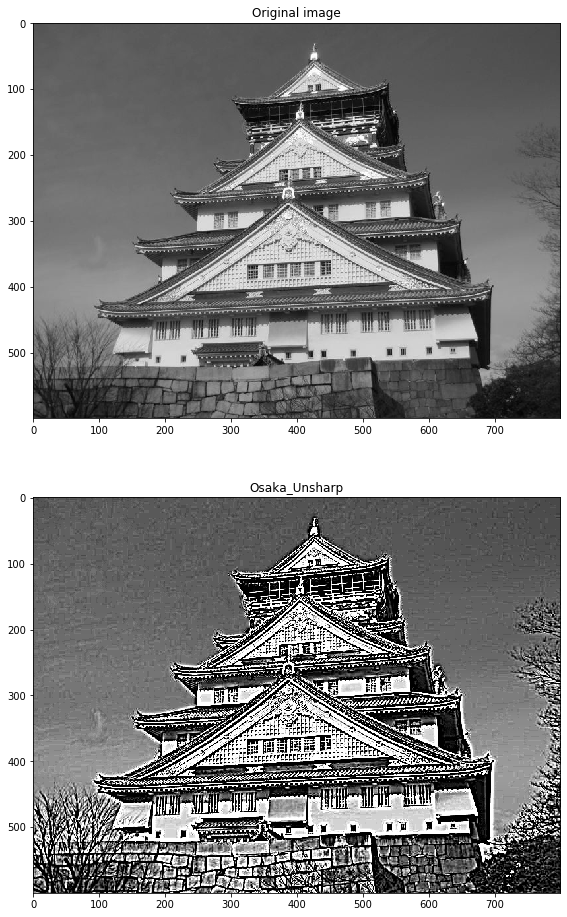

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def unsharp_masking( f, k = 1.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    f_avg = cv2.GaussianBlur( f, ( 15, 15 ), 0 )
    for x in range( nr ):
        for y in range( nc ):
            g_mask = int( f[x,y] ) - int( f_avg[x,y] ) 
            g[x,y] = np.uint8( np.clip( f[x,y] + k * g_mask, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Osaka.bmp", -1 )
    img2 = unsharp_masking( img1, 10.0 )
    cv2.imwrite( "Osaka_Unsharp.bmp", img2 )
    
    plt.figure(figsize=(16,16))
    plt.subplot(2,1,1)     
    plt.title('Original image') 
    plt.imshow(img1,cmap=plt.cm.gray)
    plt.subplot(2,1,2)     
    plt.title('Osaka_Unsharp') 
    plt.imshow(img2,cmap=plt.cm.gray)    
main( )